# Batch Gradient Descent using Pandas, Numpy, and MatPlotLib

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read in our data
data = pd.read_csv('ex1data1.txt', sep=",", names=['x','y'])
# Convert to Pandas DataFrame
df = pd.DataFrame(data)
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [162]:
# Add in the column of ones that will be the multiplier for theta_zero
x0 = pd.DataFrame(np.ones((len(df['x']), 1)))
x1 = df['x']
frames = [x0, x1]
# set x and y DataFrames and initialize our theta parameters to [0; 0]
x = pd.concat(frames, axis=1)
y = df[['y']]
theta = np.zeros((2, 1))

# set some tuning parameters
alpha = 0.01
iterations = 1500

### Cost Function

We define the cost function using Batch Gradient Descent to be:
> $\sum_{i=0}^m \frac{((\theta_0 + \theta_ix_i +...+\theta_mx_m) - y_i)^2}{2m}$

In [163]:
def computeCost(x, y, theta):
    m = len(y)
    hypothesis = x.values.dot(theta)
    error = hypothesis - y
    squaredError = error ** 2
    return ((squaredError.sum())/(2*m))

In [164]:
print('\nTesting the cost function ...\n')
# compute and display initial cost
J = computeCost(x, y, theta)
print('With theta = [[0], [0]]\nCost computed = {:0.2f}'.format(J.values[0]))
print('Expected cost value (approx) 32.07\n')

# further testing of the cost function
theta[0] = -1
theta[1] = 2
J = computeCost(x, y, theta)
print('With theta = [[-1], [2]]\nCost computed = {:0.2f}'.format(J.values[0]))
print('Expected cost value (approx) 54.24\n');


Testing the cost function ...

With theta = [[0], [0]]
Cost computed = 32.07
Expected cost value (approx) 32.07

With theta = [[-1], [2]]
Cost computed = 54.24
Expected cost value (approx) 54.24



In [165]:
def gradientDescent(x, y, theta, alpha, iterations):
    m = len(y)
    x1 = x[['x']]
    for i in range(0, iterations):
        hypothesis = x.values.dot(theta)
        error = hypothesis - y
        temp0 = theta[0] - alpha*((error.sum())/(m))
        temp1 = theta[1] - alpha*((error.T.dot(x1))/(m))
        theta[0] = temp0
        theta[1] = temp1
        cost_history[i] = computeCost(x, y, theta)
    return theta

In [166]:
theta[0] = 0
theta[1] = 0
cost_history = [0] * iterations
print('\nRunning Gradient Descent ...\n')
theta = gradientDescent(x, y, theta, alpha, iterations);

# print theta to screen
print('Theta found by gradient descent:\n');
print('Theta Zero: {:0.4f}\n'.format(theta.item(0)))
print('Theta One: {:0.4f}\n'.format(theta.item(1)))
print('Expected Theta Zero (approx): {:0.4f}\n'.format(-3.6303))
print('Expected Theta One (approx): {:0.4f}\n'.format(1.1664))


Running Gradient Descent ...

Theta found by gradient descent:

Theta Zero: -3.6303

Theta One: 1.1664

Expected Theta Zero (approx): -3.6303

Expected Theta One (approx): 1.1664



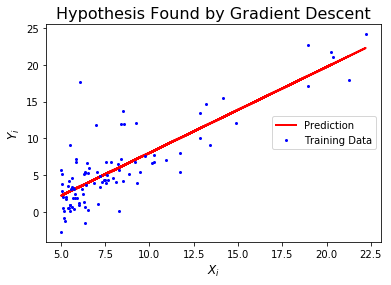

In [167]:
x1 = x[['x']]
plt.plot(x1, x.dot(theta), 'r-', label='Prediction', linewidth=2)
plt.plot(x1, y, 'bo', label='Training Data', markersize=2)
plt.xlabel(r'$X_i$', fontsize=12)
plt.ylabel(r'$Y_i$', fontsize=12)
plt.title('Hypothesis Found by Gradient Descent', fontsize=16)
plt.legend(loc=5)
plt.show()

In [168]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
costs = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(theta0_vals.shape[0]):
    for j in range(theta1_vals.shape[0]): 
        theta[0] = theta0_vals[i]
        theta[1] = theta1_vals[j]
        costs[i,j] = computeCost(x, y, theta)

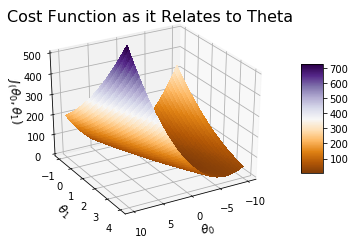

In [169]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(theta0_vals, theta1_vals, costs, cmap=cm.PuOr,
                       linewidth=0, antialiased=False, label='Cost Function')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(azim=60)
plt.title('Cost Function as it Relates to Theta', fontsize=16)
ax.set_zlim(0, 500)
ax.set_xlabel(r'$\theta_0$', fontsize=12)
ax.set_ylabel(r'$\theta_1$', fontsize=12)
ax.set_zlabel(r'$J_(\theta_0, \theta_1)$', fontsize=12)
plt.show()